<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/NLP_3_Topic_Modelling_Using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

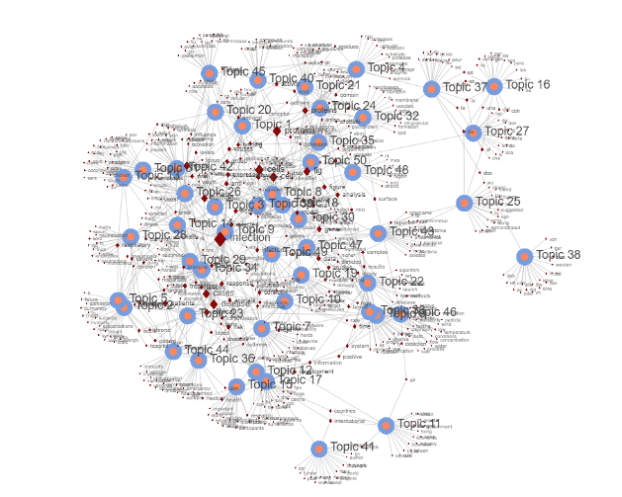

# Introduction

Have you ever had lots of text from various sources and wanted to analyze broad subject/topics what people are talking about and segregate them into certain clusters, well topic modeling is here for you. So what’s topic modeling. topic modeling is a statistical process through which you can identify, extract, and analyze topics from a given collection of documents.

In this article, we will explore topic modeling through few famous techniques.

There is a slight difference where one could get confused. Is it different from topic classification or is it the same? For starters topic classification falls under the supervised ML algorithm and topic modeling falls under the unsupervised ML algorithms. Expecting you already know the difference, in case if you don't, to put it in a one-liner topic modeling doesn't need any prior training, unlike topic classification.

Since modeling the text doesn’t require any training, this is easy to analyze data. but, one can’t guarantee one will receive precise results.

# About LDA
LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

* Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
* LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial.
* It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution.

# Data set Used
The data set I used is the 20Newsgroup data set. It is available under sklearn data sets and can be easily downloaded as

In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [7]:
# Lets look at some sample news
newsgroups_train.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

This data set has the news already grouped into key topics. Which you can get by

In [5]:
print(list(newsgroups_train.target_names))
# There are 20 targets in the data set — ‘alt.atheism’ etc

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Looking visually we can say that this data set has a few broad topics like:

* Science
* Politics
* Sports
* Religion
* Technology etc

# Extracting Topics using LDA in Python
## 1. Preprocessing the raw text

This involves the following:

* Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All stopwords are removed.
* Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are stemmed — words are reduced to their root form.

We use the NLTK and gensim libraries to perform the preprocessing



In [8]:
'''
Loading Gensim and nltk libraries
'''
# pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Lemmatizer Example
Before preprocessing our dataset, let's first look at an lemmatizing example. What would be the output if we lemmatized the word 'went':

In [14]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

go


## Stemmer Example
Let's also look at a stemming example. Let's throw a number of words at the stemmer and see how it deals with each one:

In [15]:
import pandas as pd
stemmer = SnowballStemmer("english")
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]

pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [16]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
'''
Preview a document after preprocessing
'''
document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced.']


Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'like', 'replac']


Let's now preprocess all the news headlines we have. To do that, we iterate over the list of documents in our training sample



In [18]:
processed_docs = []

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))

In [19]:
'''
Preview 'processed_docs'
'''
print(processed_docs[:2])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

## Step 3: Bag of words on the dataset
Now let's create a dictionary from 'processed_docs' containing the number of times a word appears in the training set. To do that, let's pass processed_docs to gensim.corpora.Dictionary() and call it 'dictionary'.

Prior to topic modelling, we convert the tokenized and lemmatized text to a bag of words — which you can think of as a dictionary where the key is the word and value is the number of times that word occurs in the entire corpus.

We can further filter words that occur very few times or occur very frequently.

Now for each pre-processed document we use the dictionary object just created to convert that document into a bag of words. i.e for each document we create a dictionary reporting how many words and how many times those words appear.

In [20]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

In [21]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 addit
1 bodi
2 bricklin
3 bring
4 bumper
5 call
6 colleg
7 door
8 earli
9 engin
10 enlighten


## Gensim filter_extremes

filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

Filter out tokens that appear in

* less than no_below documents (absolute number) or
* more than no_above documents (fraction of total corpus size, not absolute number).
* after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).

In [23]:
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

## Gensim doc2bow

## doc2bow(document)

Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded). No further preprocessing is done on the words in document; apply tokenization, stemming etc. before calling this method.

In [24]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [25]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 18 ("rest") appears 1 time.
Word 166 ("clear") appears 1 time.
Word 336 ("refer") appears 1 time.
Word 350 ("true") appears 1 time.
Word 391 ("technolog") appears 1 time.
Word 437 ("christian") appears 1 time.
Word 453 ("exampl") appears 1 time.
Word 476 ("jew") appears 1 time.
Word 480 ("lead") appears 1 time.
Word 482 ("littl") appears 3 time.
Word 520 ("wors") appears 2 time.
Word 721 ("keith") appears 3 time.
Word 732 ("punish") appears 1 time.
Word 803 ("california") appears 1 time.
Word 859 ("institut") appears 1 time.
Word 917 ("similar") appears 1 time.
Word 990 ("allan") appears 1 time.
Word 991 ("anti") appears 1 time.
Word 992 ("arriv") appears 1 time.
Word 993 ("austria") appears 1 time.
Word 994 ("caltech") appears 2 time.
Word 995 ("distinguish") appears 1 time.
Word 996 ("german") appears 1 time.
Word 997 ("germani") appears 3 time.
Word 998 ("hitler") appears 1 time.
Word 999 ("livesey") appears 2 time.
Word 1000 ("motto") appears 2 time.
Word 1001 ("order") appear

## 3. Running LDA

This is actually quite simple as we can use the gensim LDA model. We need to specify how many topics are there in the data set. Lets say we start with 8 unique topics. Num of passes is the number of training passes over the document.

We are going for 10 topics in the document corpus.

We will be running LDA using all CPU cores to parallelize and speed up model training.

Some of the parameters we will be tweaking are:

* **num_topics** is the number of requested latent topics to be extracted from the training corpus.
* **id2word** is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
* **workers** is the number of extra processes to use for parallelization. Uses all available cores by default.
* alpha and eta are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

### Alpha is the per document topic distribution.

High alpha: Every document has a mixture of all topics(documents appear similar to each other).

Low alpha: Every document has a mixture of very few topics
### Eta is the per topic word distribution.

High eta: Each topic has a mixture of most words(topics appear similar to each other).

Low eta: Each topic has a mixture of few words.

**passes** is the number of training passes through the corpus. For example, if the training corpus has 50,000 documents, chunksize is 10,000, passes is 2, then online training is done in 10 updates:

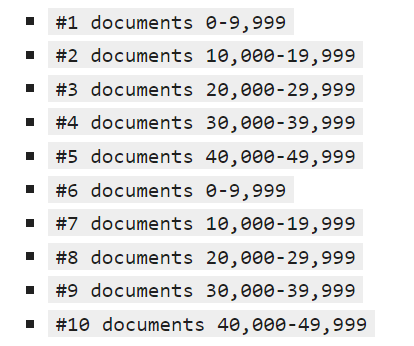

In [26]:
# LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
# lda_model = gensim.models.LdaModel(bow_corpus, 
#                                    num_topics = 10, 
#                                    id2word = dictionary,                                    
#                                    passes = 50)

# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [27]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"armenian" + 0.011*"game" + 0.010*"team" + 0.007*"turkish" + 0.006*"play" + 0.006*"player" + 0.005*"season" + 0.004*"leagu" + 0.004*"basebal" + 0.004*"leav"


Topic: 1 
Words: 0.017*"drive" + 0.006*"control" + 0.005*"hard" + 0.005*"disk" + 0.004*"bike" + 0.004*"firearm" + 0.004*"caus" + 0.004*"effect" + 0.003*"car" + 0.003*"weapon"


Topic: 2 
Words: 0.011*"scsi" + 0.009*"wire" + 0.008*"power" + 0.006*"appl" + 0.005*"control" + 0.005*"chip" + 0.005*"speed" + 0.005*"data" + 0.005*"connect" + 0.004*"circuit"


Topic: 3 
Words: 0.010*"space" + 0.009*"nasa" + 0.005*"presid" + 0.005*"nation" + 0.004*"research" + 0.004*"program" + 0.004*"center" + 0.004*"report" + 0.004*"health" + 0.004*"group"


Topic: 4 
Words: 0.011*"govern" + 0.010*"encrypt" + 0.008*"secur" + 0.007*"chip" + 0.007*"israel" + 0.006*"clipper" + 0.006*"public" + 0.006*"isra" + 0.005*"protect" + 0.004*"key"


Topic: 5 
Words: 0.010*"game" + 0.008*"play" + 0.008*"toronto" + 0.007*"hockey" + 0.007*"team" 

## Classification of the topics
Using the words in each topic and their corresponding weights, what categories were you able to infer?

Topic 0: Politics

Topic 1: Gun Violence

Topic 2: Graphic Cards

Topic 3: Space

Topic 4: Encryption

Topic 5: Sports

Topic 6: Technology

Topic 7: Religion

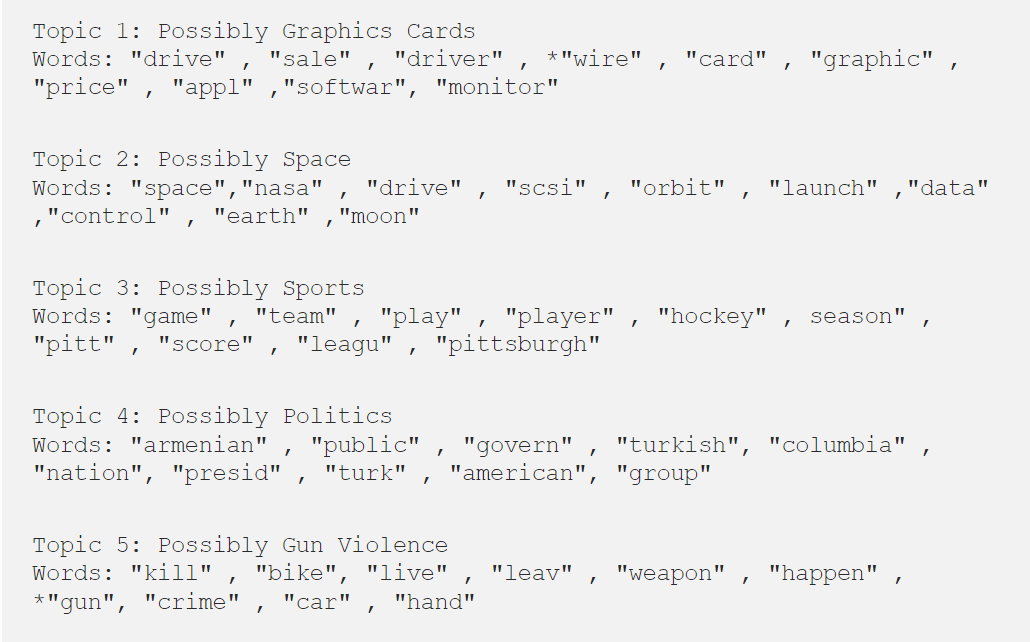

# Observations:

* The model did impressively well in extracting the unique topics in the data set which we can confirm given we know the target names
* The model runs very quickly. I could extract topics from data set in minutes
* It does assume that there are distinct topics in the data set. So if the data set is a bunch of random tweets than the model results may not be as interpretable.